In [57]:
# Import necessary libraries
import pandas as pd

# Load the Titanic dataset
data = pd.read_csv('train.csv')

In [58]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
# Exploratory Data Analysis (EDA)
# 1. How many rows and columns are there in the dataset?
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 891
Number of columns: 12


In [60]:
# 3. How many missing values are there in each column?
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [61]:
from sklearn.impute import SimpleImputer

#Age is a continuous variable hence we use average imputation.
age_imputer = SimpleImputer(strategy='mean')
data['Age'] = age_imputer.fit_transform(data[['Age']])

#Cabin and Embarked are categorical variables, hence we use mode imputation instead of mean imputation.
cabin_imputer = SimpleImputer(strategy='most_frequent')
# The fit_transform method returns a 2D array, we need to flatten it to 1D using ravel()
data['Cabin'] = cabin_imputer.fit_transform(data[['Cabin']]).ravel()


embarked_imputer = SimpleImputer(strategy='most_frequent')
data['Embarked'] = embarked_imputer.fit_transform(data[['Embarked']]).ravel()

missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [62]:
# 5. What is the distribution of passenger classes?
passenger_class = data['Pclass'].value_counts()
print("Passenger class distribution:")
print(passenger_class)

Passenger class distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [63]:
embarked_counts = data['Embarked'].value_counts()
print("Passengers embarked from each port:")
print(embarked_counts)

Passengers embarked from each port:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [64]:
survived_count = data['Survived'].sum()

print("Number of passengers who survived:", survived_count)

Number of passengers who survived: 342


In [65]:
survival_rate = data['Survived'].mean() * 100
print("Survival rate: {:.2f}%".format(survival_rate))

Survival rate: 38.38%


<ipython-input-70-8b9da639a704>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, palette=custom_colors)
<ipython-input-70-8b9da639a704>:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='Sex', y='Survived', data=data, palette=custom_colors)


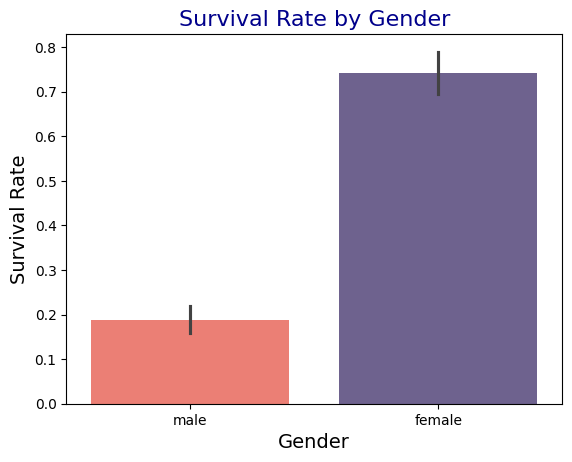

In [70]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace 'data' with your actual DataFrame)
# data = sns.load_dataset('titanic') # Uncomment if you want sample data

#  Define a custom color palette
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B']  # Orange, Purple, Green

# 1. Plotting survival rate by gender
sns.barplot(x='Sex', y='Survived', data=data, palette=custom_colors)

#  Titles and labels
plt.title("Survival Rate by Gender", fontsize=16, color='darkblue')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Survival Rate", fontsize=14)

plt.show()


<ipython-input-71-fb522668c7c9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette=custom_colors)


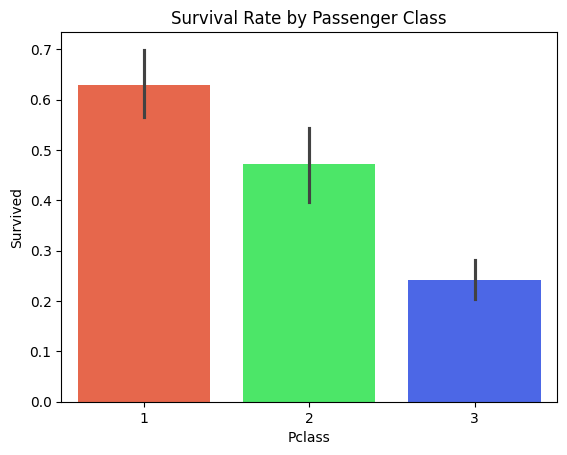

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is already your DataFrame

# Set custom color palette: 3 different colors
custom_colors = ['#FF5733', '#33FF57', '#3357FF']  # Orange, Green, Blue

# Plot
sns.barplot(x='Pclass', y='Survived', data=data, palette=custom_colors)
plt.title("Survival Rate by Passenger Class")
plt.show()


<ipython-input-72-1697a710d4cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data, palette=colors)


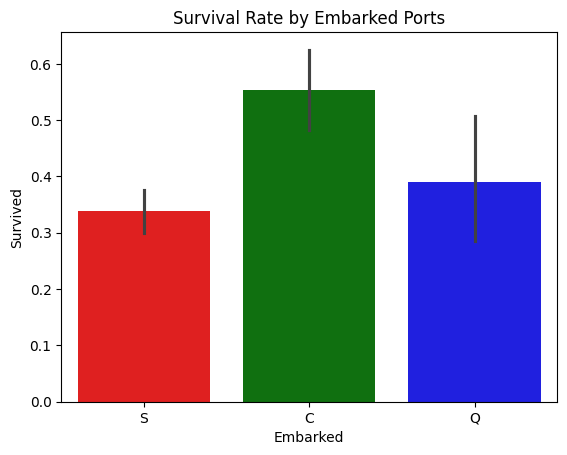

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for each 'Embarked' category
colors = ['red', 'green', 'blue']  # Example: red for C, green for Q, blue for S

# Plot
sns.barplot(x='Embarked', y='Survived', data=data, palette=colors)

# Title and show
plt.title("Survival Rate by Embarked Ports")
plt.show()
